# SPAM Text Classifier
---
---

## Load Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv(r"C:\Users\06533V744\Desktop\Project\Spam Messege Classification NLP\1_Jupyter\Data\Spam.csv")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,9.0
1,ham,Ok lar... Joking wif u oni...,29.0,6.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
3,ham,U dun say so early hor... U c already then say...,49.0,6.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,2.0


## Check Null Valus

In [3]:
df.isnull().sum()

label      0
message    0
length     2
punct      2
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.shape

(5572, 4)

## Check Value Counts

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Dataset Balancing

In [8]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [9]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [10]:
ham = ham.sample(747)

In [11]:
ham.head()

,label,message,length,punct
395,ham,Pick you up bout 7.30ish? What time are and t...,56.0,3.0
46,ham,Didn't you get hep b immunisation in nigeria.,45.0,2.0
3781,ham,Then ur physics get a-?,23.0,2.0
5444,ham,"I thought i'd get him a watch, just cos thats ...",99.0,4.0
3057,ham,Webpage s not available!,24.0,1.0


In [12]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,6.0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147.0,8.0
8,spam,WINNER!! As a valued network customer you have...,157.0,6.0
9,spam,Had your mobile 11 months or more? U R entitle...,154.0,2.0
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136.0,8.0


In [13]:
ham.shape

(747, 4)

In [14]:
spam.shape

(747, 4)

## Preparing New Data

In [15]:
data = pd.concat([ham, spam], axis = 0, ignore_index= True)

In [16]:
data.shape

(1494, 4)

In [17]:
data.sample(5)

,label,message,length,punct
363,ham,Oh k.i think most of wi and nz players unsold.,46.0,2.0
347,ham,What time is ur flight tmr?,27.0,1.0
358,ham,They have a thread on the wishlist section of ...,144.0,2.0
228,ham,Mum say we wan to go then go... Then she can s...,84.0,6.0
1138,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...,151.0,3.0


## Exploratory Data Analysis

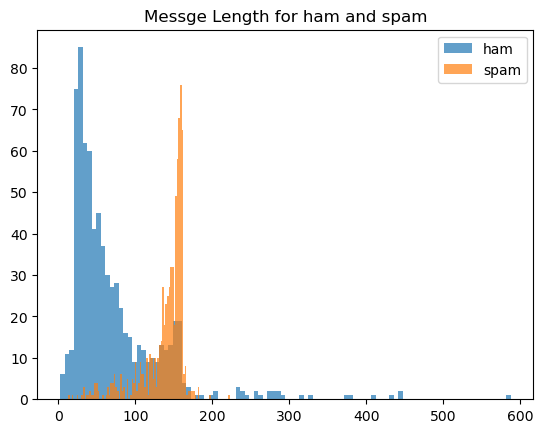

In [18]:
plt.hist(x = ham['length'], bins= 100, alpha = 0.7, label='ham')
plt.hist(x = spam['length'], bins= 100, alpha = 0.7, label='spam')

plt.title("Messge Length for ham and spam")
plt.legend()
plt.show()

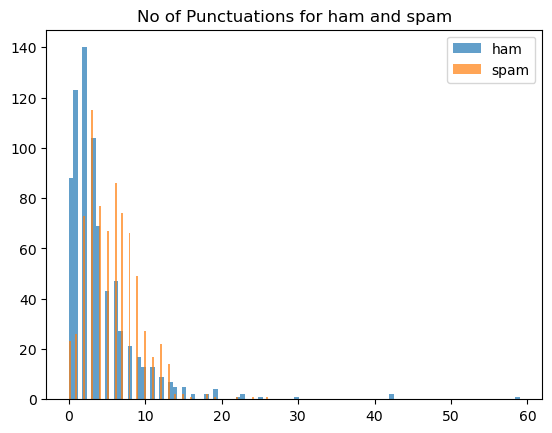

In [19]:
plt.hist(x = ham['punct'], bins= 100, alpha = 0.7, label='ham')
plt.hist(x = spam['punct'], bins= 100, alpha = 0.7, label='spam')

plt.title("No of Punctuations for ham and spam")
plt.legend()
plt.show()

#### Conclusion : 

Length is high in Spam messeges

No of Punctuations is more in Spam messeges

## Data Preparation for Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\06533V744\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],data['label'], test_size=0.33, random_state=42)

In [22]:
X_train.shape, X_test.shape

((1000,), (494,))

In [23]:
y_train.shape, y_test.shape

((1000,), (494,))

## Building Pipeline

In [24]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

## Prediction

In [25]:
y_pred = clf.predict(X_test)

## Performance Report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       245
        spam       1.00      0.90      0.94       249

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



## Predict on Random Data

In [27]:
clf.predict(['You won 100 rs lottery, please give 10 rs for home delivery'])

array(['spam'], dtype=object)

## Save in Pickle

In [28]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

## Load Pickle

In [29]:
model = pickle.load(open('model.pkl', 'rb'))

In [30]:
## predict using this model

model.predict(['You won 100 rs lottery, please give 10 rs for home delivery',
               'India won the FIFA World Cup',
               'I trust AI',
                'AI can generate all the task, please subscribe'])

array(['spam', 'ham', 'ham', 'ham'], dtype=object)